# Reliance Industries Stock Forecast

### Business Objective:
Predict the Reliance Industries Stock Price for the next 1 year.
There are Open, High, Low and Close prices that you need to obtain from the web for  day starting from 2000 to 2022 for Reliance Industries stock.

●	Split the last year into a test set- to build a model to predict stock price.

●	Find short term, & long term trends.

●	Understand how it is impacted from external factors or any big external events.

●	Forecast for next 1 year.


## Import Library


In [1]:
import pandas as pd
import numpy as np
##For Visualize
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots


#Model Building
import statsmodels.formula.api as smf 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from pmdarima.arima import auto_arima
import statsmodels.api as sm

import math
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")
#pd.set_option("display.max.columns", None)

## About the DATA

### Data On Daily Basis
 
Date: Date of trade

Close: Close price adjusted for splits.

Volume: Volume of stock on that day

In [2]:
data=pd.read_csv('RELIANCE.NS .csv',parse_dates=True,squeeze=True)
data

,Date,Close,Volume
0,2000-01-03,38.944569,28802010
1,2000-01-04,42.062302,61320457
2,2000-01-05,43.710136,173426953
3,2000-01-06,45.543640,101355113
4,2000-01-07,48.669109,128426756
...,...,...,...
5750,2022-12-26,2524.050049,2764496
5751,2022-12-27,2544.699951,2659749
5752,2022-12-28,2544.449951,3442509
5753,2022-12-29,2543.300049,3198493


In [3]:
data.head(10)

,Date,Close,Volume
0,2000-01-03,38.944569,28802010
1,2000-01-04,42.062302,61320457
2,2000-01-05,43.710136,173426953
3,2000-01-06,45.543640,101355113
4,2000-01-07,48.669109,128426756
5,2000-01-10,47.733013,86714866
6,2000-01-11,44.638493,81074352
7,2000-01-12,46.680878,78264129
8,2000-01-13,48.251347,110363002
9,2000-01-14,48.939880,86996234


In [4]:
data.tail(10)

,Date,Close,Volume
5745,2022-12-19,2599.300049,3567363
5746,2022-12-20,2621.800049,3446291
5747,2022-12-21,2584.500000,3935463
5748,2022-12-22,2577.800049,3438692
5749,2022-12-23,2502.199951,4733657
5750,2022-12-26,2524.050049,2764496
5751,2022-12-27,2544.699951,2659749
5752,2022-12-28,2544.449951,3442509
5753,2022-12-29,2543.300049,3198493
5754,2022-12-30,2547.199951,3364092


### EDA

In [5]:
data.columns

Index(['Date', 'Close', 'Volume'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5755 non-null   object 
 1   Close   5755 non-null   float64
 2   Volume  5755 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 135.0+ KB


##### 5755 entries in dataset with 3 column's

In [7]:
data.describe()

,Close,Volume
count,5755.000000,5.755000e+03
mean,636.771025,1.678769e+07
std,679.171661,1.809711e+07
min,0.000000,0.000000e+00
25%,99.365127,6.315362e+06
50%,446.046936,1.015220e+07
75%,674.091522,2.032690e+07
max,2819.850098,2.918015e+08


In [8]:
##Check Missing value in data
data.isnull().sum()

Date      0
Close     0
Volume    0
dtype: int64

 ##### No Missing Value in Dataset

In [9]:
data.dtypes

Date       object
Close     float64
Volume      int64
dtype: object

Close column have Float Datatype & Volume have int datatype,

Here Date has a object Datatype let's convert it into Datatime datatype

In [10]:
# converting the date column in to datetime 
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')


In [11]:
data.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
dtype: object

In [12]:
data.nunique()

Date      5755
Close     5253
Volume    5689
dtype: int64

Here all unique value so we can't use countplot in visulazation

In [13]:
# Finding duplicate rows
data[data.duplicated()]

,Date,Close,Volume


No duplicate value in Dataset

##### split date into year for visulatization purpose

In [14]:
data['Year'] = pd.to_datetime(data['Date'],errors='coerce').dt.strftime("%Y")
data

,Date,Close,Volume,Year
0,2000-01-03,38.944569,28802010,2000
1,2000-01-04,42.062302,61320457,2000
2,2000-01-05,43.710136,173426953,2000
3,2000-01-06,45.543640,101355113,2000
4,2000-01-07,48.669109,128426756,2000
...,...,...,...,...
5750,2022-12-26,2524.050049,2764496,2022
5751,2022-12-27,2544.699951,2659749,2022
5752,2022-12-28,2544.449951,3442509,2022
5753,2022-12-29,2543.300049,3198493,2022


## Outlier Detection

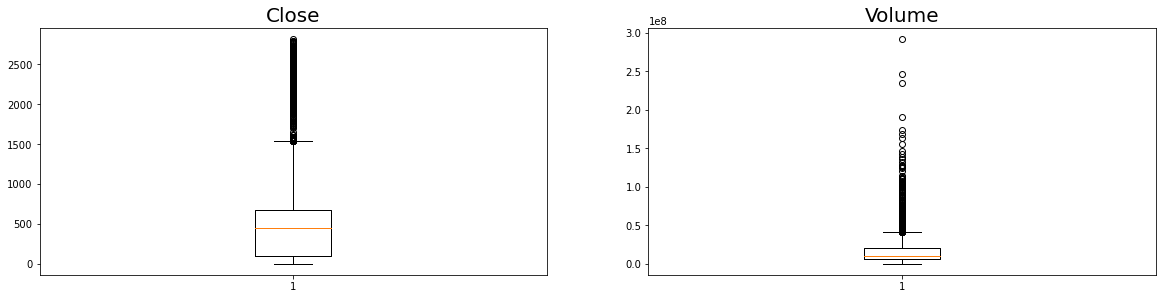

In [15]:
# Create a boxplot for each variable to check the distribution of data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
plt.boxplot(x='Close',data=data)
plt.title('Close',fontsize=20)

plt.subplot(2,2,2)
plt.boxplot(x='Volume',data=data)
plt.title('Volume',fontsize=20)
plt.show()
    
    
    

In [16]:
data.set_index('Date')

,Close,Volume,Year
Date,,,
2000-01-03,38.944569,28802010,2000
2000-01-04,42.062302,61320457,2000
2000-01-05,43.710136,173426953,2000
2000-01-06,45.543640,101355113,2000
2000-01-07,48.669109,128426756,2000
...,...,...,...
2022-12-26,2524.050049,2764496,2022
2022-12-27,2544.699951,2659749,2022
2022-12-28,2544.449951,3442509,2022


#### Yearwise outlier's Distribution

<AxesSubplot:xlabel='Year', ylabel='Volume'>

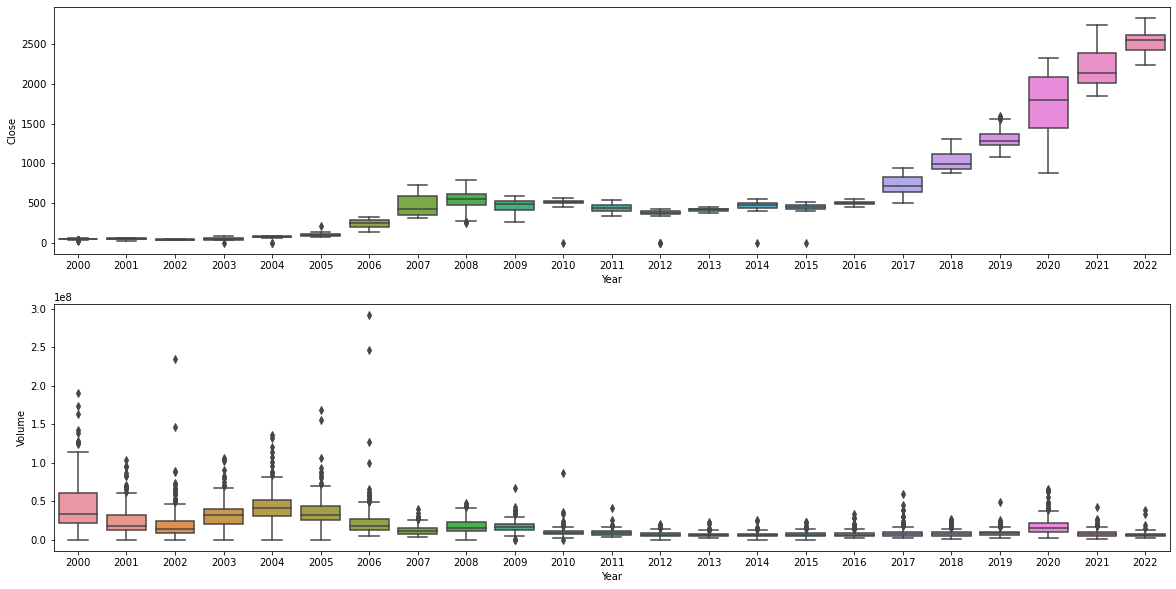

In [17]:
# Boxplot for ever
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.boxplot(x="Year",y="Close",data=data)
plt.subplot(212)
sns.boxplot(x="Year",y="Volume",data=data)

1. Winsorization:

 Winsorization is a process of transforming data by limiting extreme values to a specified percentile. Instead of removing  outliers, winsorization replaces them with the nearest values that are within the specified range. This method helps reduce the impact of extreme values while preserving the overall distribution of the data.

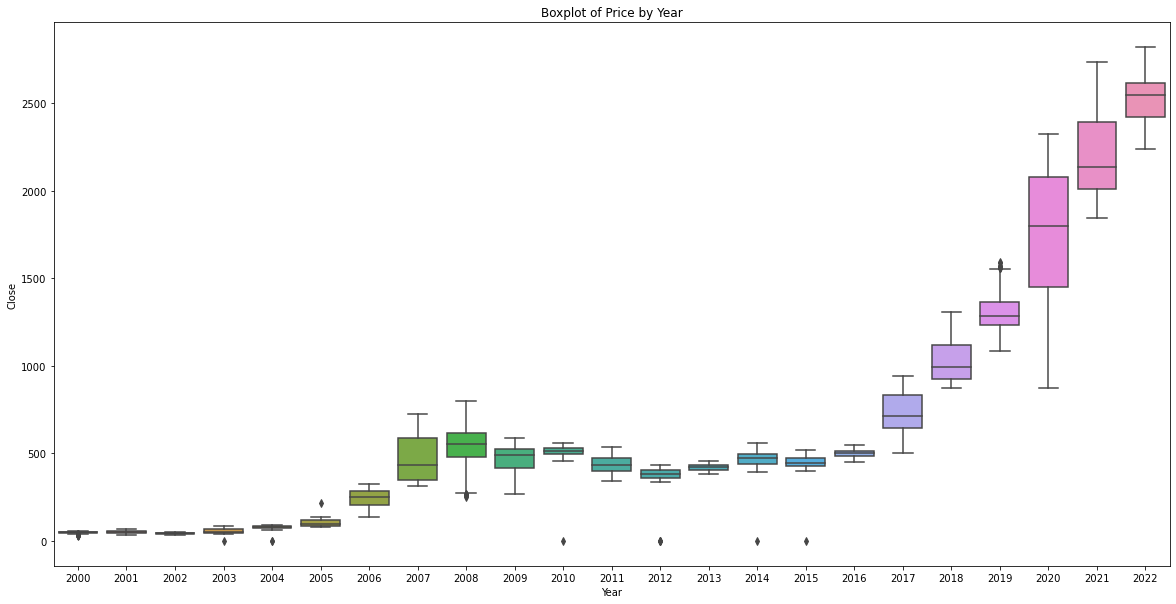

In [18]:
plt.figure(figsize=(20,10))
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year

# Generate box plots for each year
sns.boxplot(data=data, x='Year', y='Close')

# Treat outliers using winsorization
q1 = data['Close'].quantile(0.25)
q3 = data['Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data['Close'] = data['Close'].clip(lower=lower_bound, upper=upper_bound)

plt.title('Boxplot of Price by Year')
plt.xlabel('Year')
plt.ylabel('Close')
plt.show()

2 Interquartile Range (IQR) Method:

The IQR method is another approach to identify and treat outliers based on the spread of the data. The interquartile range is a measure of statistical dispersion that represents the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.

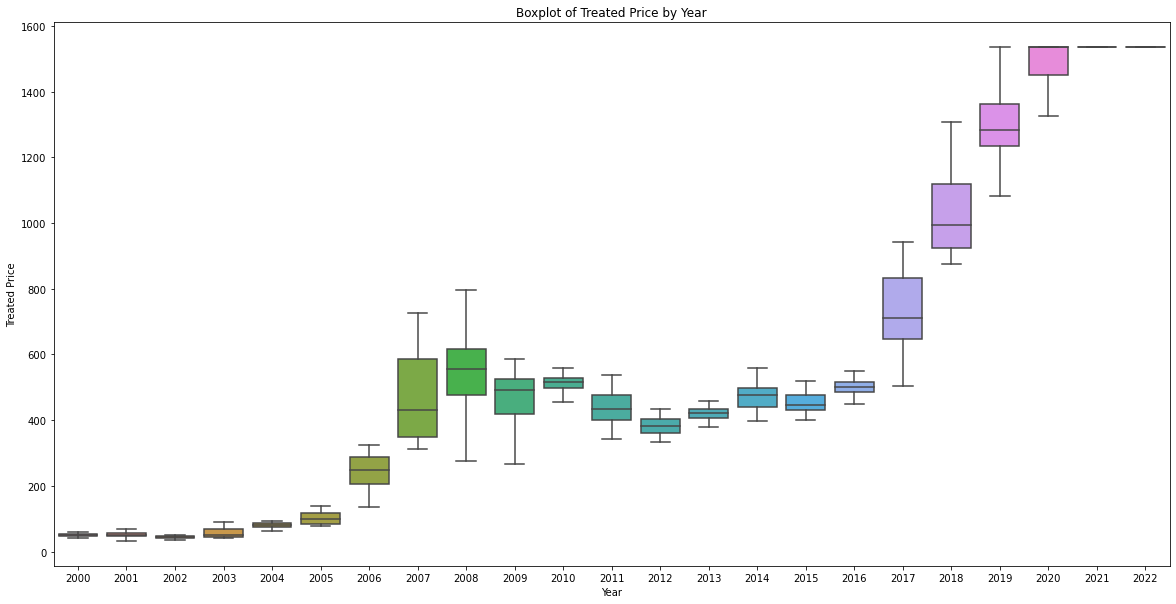

In [19]:
# Treat outliers using IQR method
plt.figure(figsize=(20,10))
q1 = data['Close'].quantile(0.25)
q3 = data['Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data['Treated_Price'] = data['Close'].clip(lower=lower_bound, upper=upper_bound)

# Generate box plot of treated data
sns.boxplot(data=data, x='Year', y='Treated_Price', showfliers=False)

# Set the title and labels for the plot
plt.title('Boxplot of Treated Price by Year')
plt.xlabel('Year')
plt.ylabel('Treated Price')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Close')

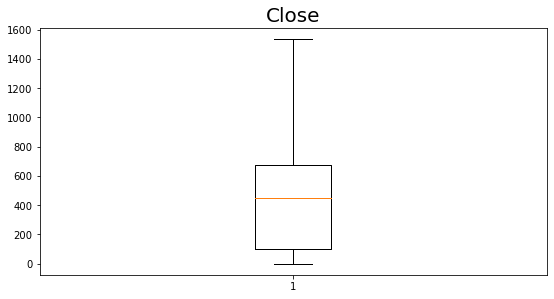

In [20]:
# Create a boxplot for overall data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
plt.boxplot(x='Close',data=data)
plt.title('Close',fontsize=20)

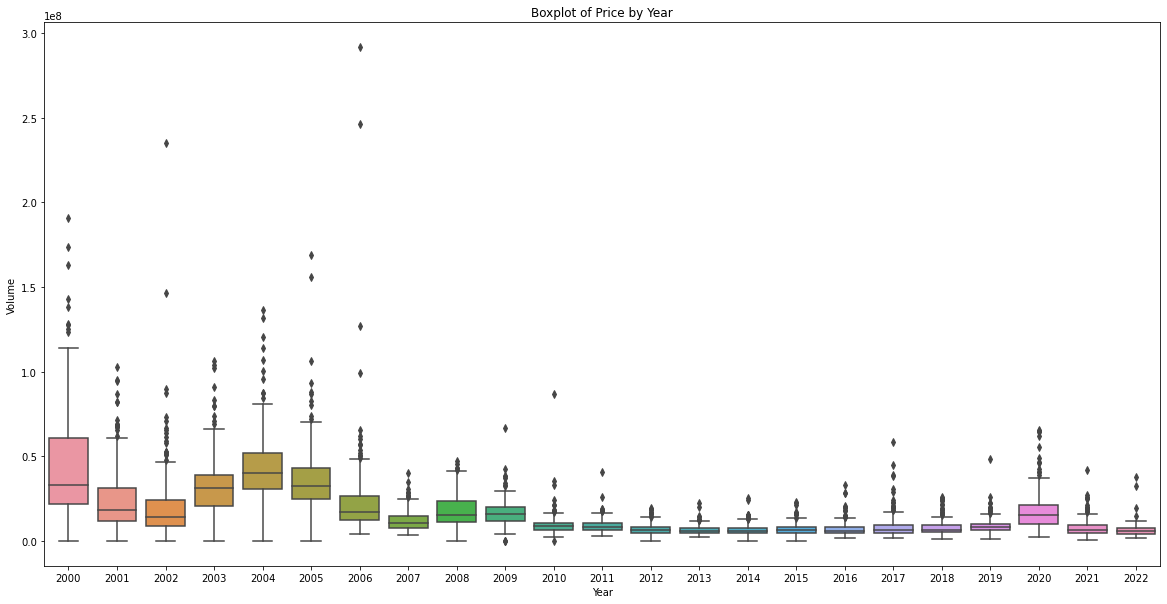

In [21]:
plt.figure(figsize=(20,10))
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year

# Generate box plots for each year
sns.boxplot(data=data, x='Year', y='Volume')

# Treat outliers using winsorization
q1 = data['Volume'].quantile(0.25)
q3 = data['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data['Volume'] = data['Volume'].clip(lower=lower_bound, upper=upper_bound)

plt.title('Boxplot of Price by Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

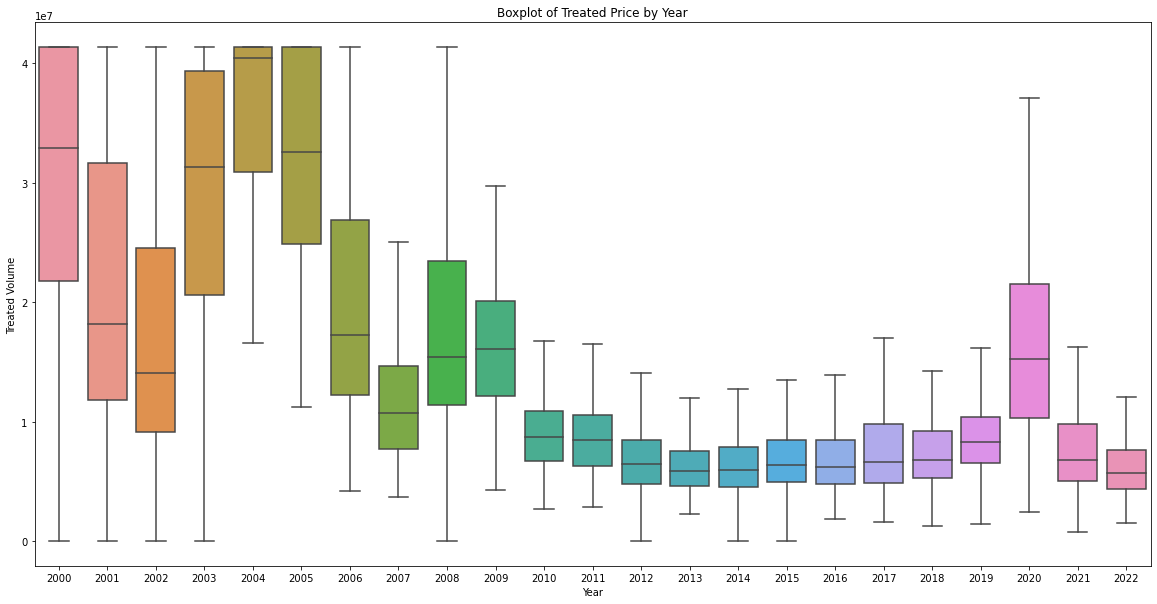

In [22]:
# Treat outliers using IQR method
plt.figure(figsize=(20,10))
q1 = data['Volume'].quantile(0.25)
q3 = data['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data['Treated_Volume'] = data['Volume'].clip(lower=lower_bound, upper=upper_bound)

# Generate box plot of treated data
sns.boxplot(data=data, x='Year', y='Treated_Volume', showfliers=False)

# Set the title and labels for the plot
plt.title('Boxplot of Treated Price by Year')
plt.xlabel('Year')
plt.ylabel('Treated Volume')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Volume')

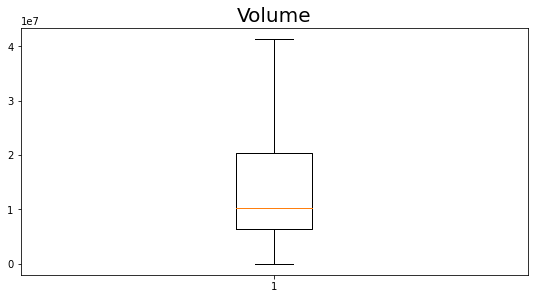

In [23]:
# Create a boxplot for overall data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
plt.boxplot(x='Volume',data=data)
plt.title('Volume',fontsize=20)

## Data Visualization

In [24]:
data['Year'] = pd.to_datetime(data['Date']).dt.strftime("%Y")
data['Month'] = pd.to_datetime(data['Date']).dt.strftime('%b')
#data['Day'] = pd.to_datetime(data['Date']).dt.strftime("%d")
data.head()

,Date,Close,Volume,Year,Treated_Price,Treated_Volume,Month
0,2000-01-03,38.944569,28802010.00,2000,38.944569,28802010.00,Jan
1,2000-01-04,42.062302,41344215.75,2000,42.062302,41344215.75,Jan
2,2000-01-05,43.710136,41344215.75,2000,43.710136,41344215.75,Jan
3,2000-01-06,45.543640,41344215.75,2000,45.543640,41344215.75,Jan
4,2000-01-07,48.669109,41344215.75,2000,48.669109,41344215.75,Jan


## Barplot

Text(0, 0.5, 'Price')

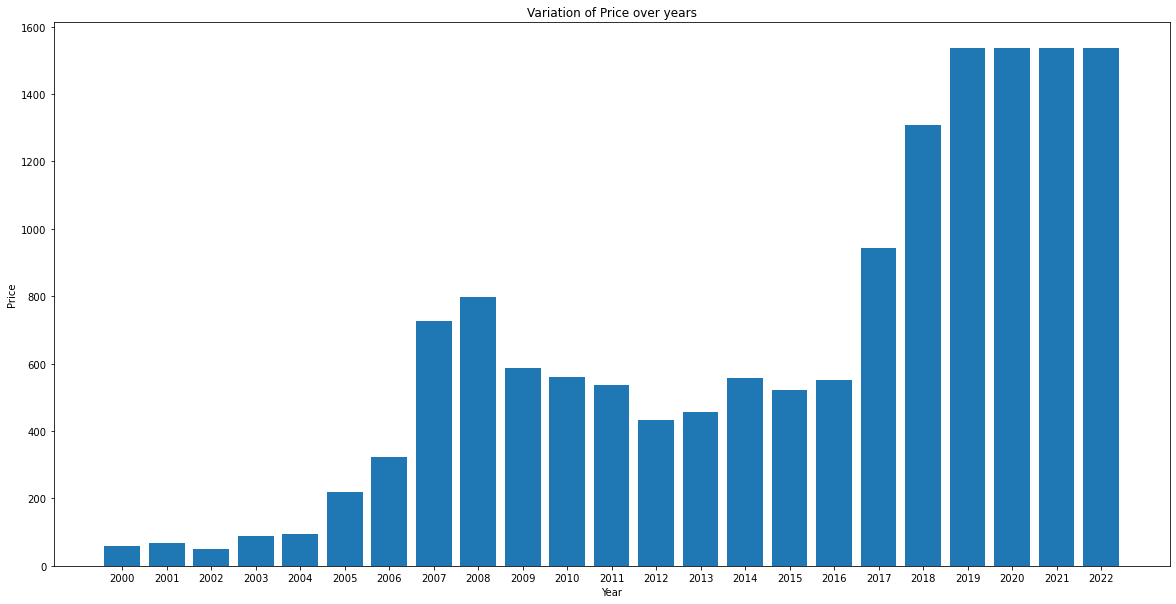

In [25]:
## Create bar plot
plt.figure(figsize=(20,10))
x=data['Year']
y=data['Treated_Price']
plt.bar(x,y)
plt.title('Variation of Price over years')
plt.xlabel('Year')
plt.ylabel('Price')

    With The Help of Barplot we can see the after 2008 the close price decresed but after 2016 it get increased to till last year

Text(0, 0.5, 'Volume')

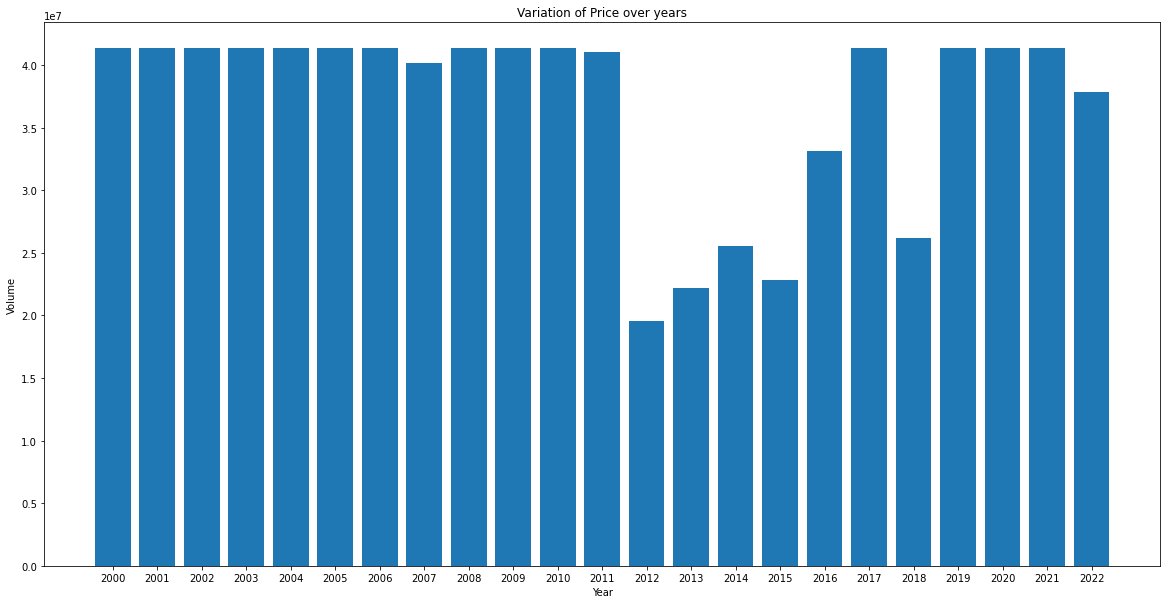

In [26]:
## Create bar plot
plt.figure(figsize=(20,10))
x=data['Year']
y=data['Treated_Volume']
plt.bar(x,y)
plt.title('Variation of Price over years')
plt.xlabel('Year')
plt.ylabel('Volume')

## Heatmap

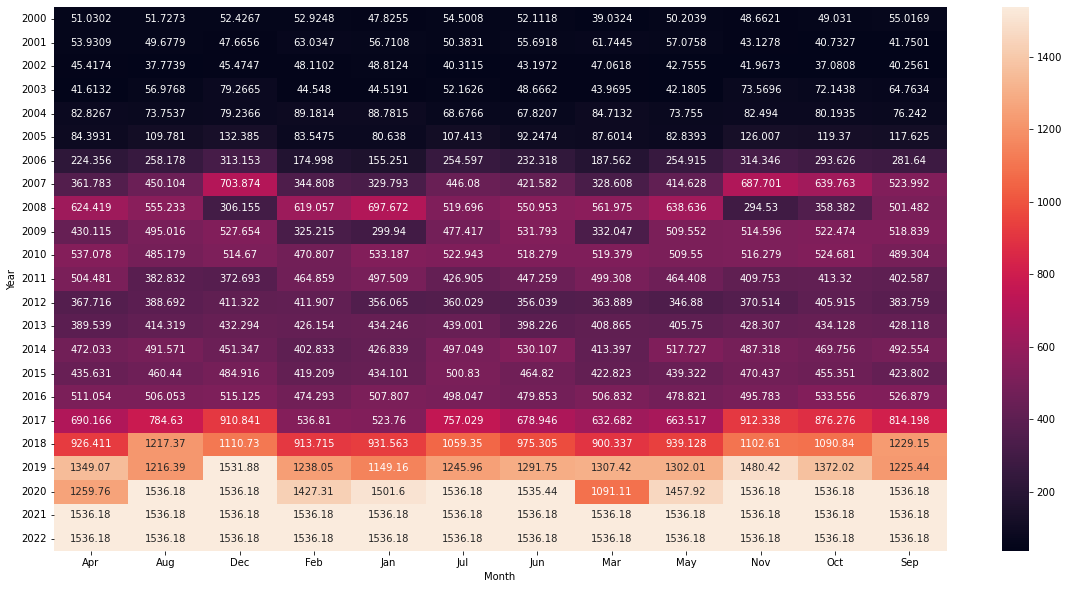

In [27]:
plt.figure(figsize=(20,10))
heatmap_y_month=pd.pivot_table(data=data,values="Treated_Price",index='Year',columns="Month",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')
plt.show()

As per heatmap the year by year price get incresed from 2000 to 2005 the closing price is very low from 2006 to 2017 it get increased at same treand and for 2020 to 2022 it is very much simlilar 


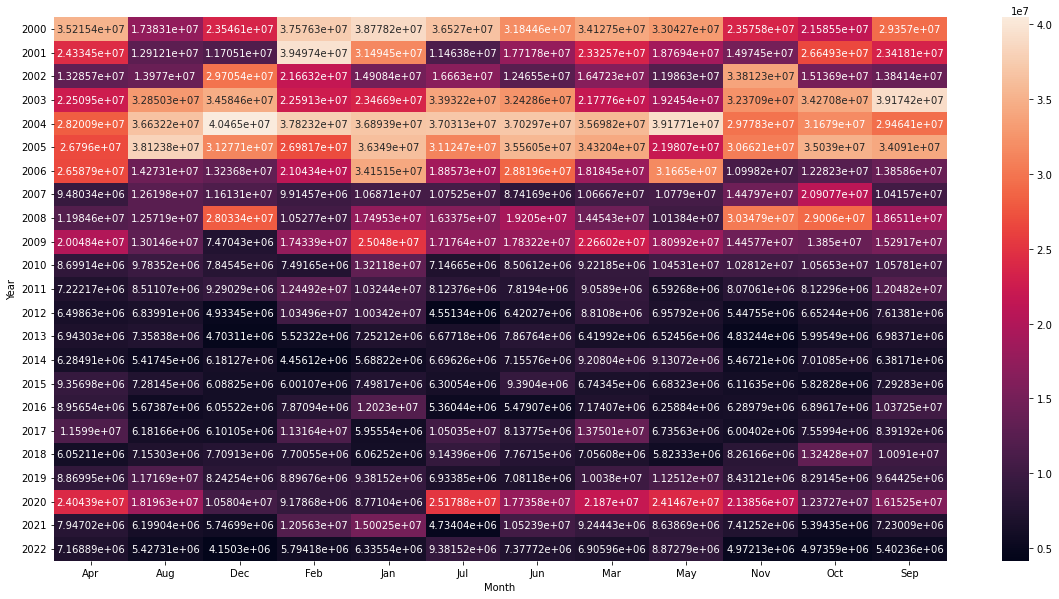

In [28]:
plt.figure(figsize=(20,10))
heatmap_y_month=pd.pivot_table(data=data,values="Treated_Volume",index='Year',columns="Month",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')
plt.show()

## Lineplot

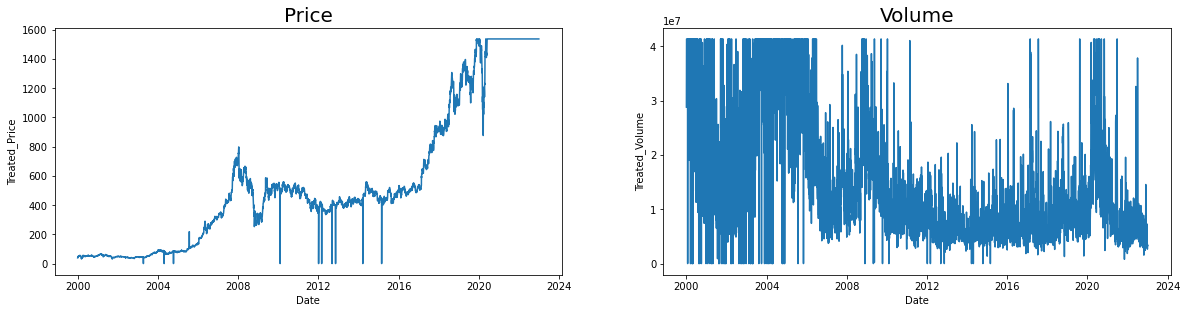

In [29]:
plt.figure(figsize=(20,10))
# create a density plot
plt.subplot(2,2,1)
sns.lineplot(x='Date',y='Treated_Price',data=data)
plt.title('Price',fontsize=20)

plt.subplot(2,2,2)
sns.lineplot(x='Date',y='Treated_Volume',data=data)
plt.title('Volume',fontsize=20)
plt.show()

### Plotting Density and Histogram for Target Colume

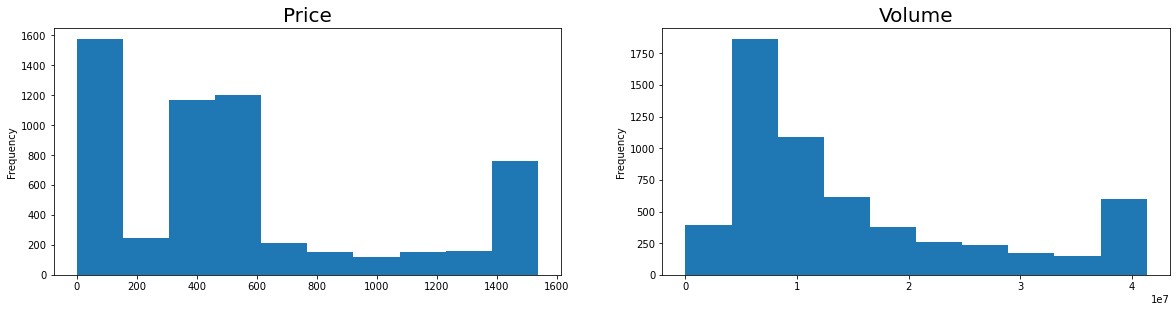

In [30]:
plt.figure(figsize=(20,10))
# create a density plot
plt.subplot(2,2,1)
data['Treated_Price'].plot(kind='hist')
plt.title('Price',fontsize=20)

plt.subplot(2,2,2)
data['Treated_Volume'].plot(kind='hist')
plt.title('Volume',fontsize=20)
plt.show()


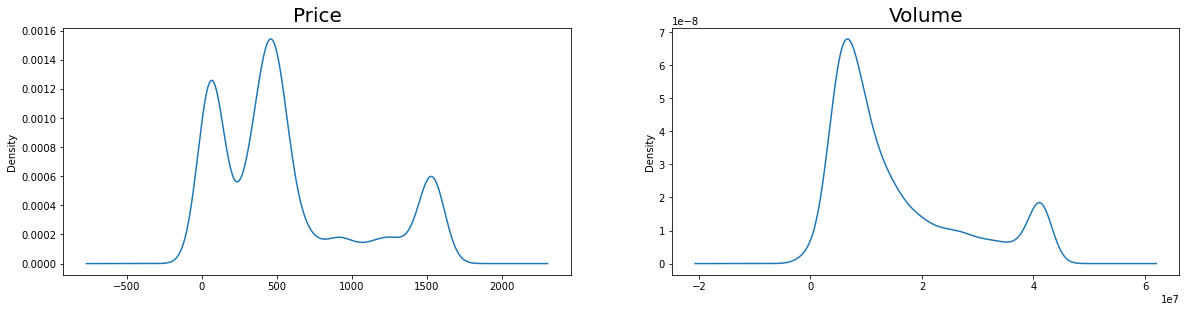

In [31]:
plt.figure(figsize=(20,10))
# create a density plot
plt.subplot(2,2,1)
data['Treated_Price'].plot(kind='kde')
plt.title('Price',fontsize=20)

plt.subplot(2,2,2)
data['Treated_Volume'].plot(kind='kde')
plt.title('Volume',fontsize=20)
plt.show()


## Data Transfromation

In [32]:
d1=data['Treated_Price'].skew()
print('The Skewness of Close Price is =',d1)
d2=data['Treated_Volume'].skew()
print('The Skewness of Volume is =',d2)

The Skewness of Close Price is = 0.9601562325865446
The Skewness of Volume is = 1.122629200721033


Generally, skewness values if within -0.5 to 0.5 then said distribution can be considered Normally skewed distribution and within this range, it can be also considered as approximately normally distributed.

### Data is sightly right Skewed

Let's use sqrt transformation

In [33]:
data['Treated_Price']=np.sqrt(data['Treated_Price'])
data['Treated_Volume']=np.sqrt(data['Treated_Volume'])


In [34]:
d1=data['Treated_Price'].skew()
print('The Skewness of Close Price is =',d1)
d2=data['Treated_Volume'].skew()
print('The Skewness of Volume is =',d2)

The Skewness of Close Price is = 0.26155970910923315
The Skewness of Volume is = 0.558744734993751


Now data is normally distributed

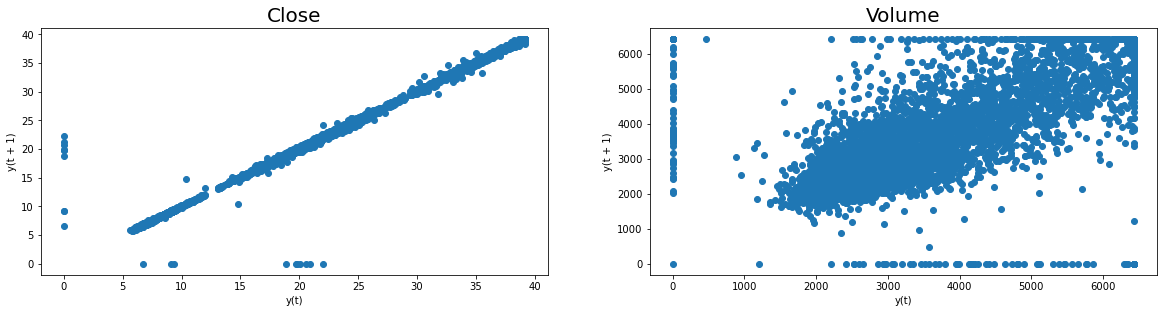

In [35]:
# lagplot-it is scatterplot between target Vs target with 1 delay(lag)
plt.figure(figsize=(20,10))
# create a density plot
plt.subplot(2,2,1)
lag_plot(data['Treated_Price'])
plt.title('Close',fontsize=20)

plt.subplot(2,2,2)
lag_plot(data['Treated_Volume'])
plt.title('Volume',fontsize=20)
plt.show()

from above lag plot it shows that,feature and target are highly positively correlated with each other,That means Forecasting better for close

# Moving Average 
    The moving average is calculated by taking the average of a set of data points over a specific period and then shifting the window of data points by one and recalculating the average. This process is repeated until the desired number of data points have been considered.

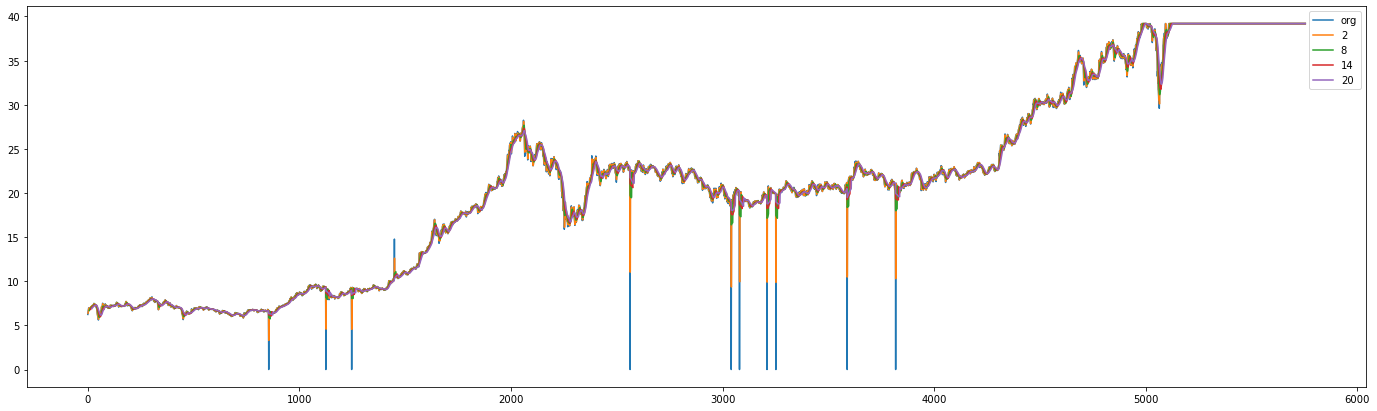

In [36]:
plt.figure(figsize=(24,7))
data['Treated_Price'].plot(label="org")
for i in range(2,24,6):
    #plt.figure(figsize=(24,7))
    data['Treated_Price'].rolling(i).mean().plot(label=str(i))
    #plt.title("MA"+str(i))
plt.legend(loc='best')
plt.show()

### Time series decomposition plot
     It is use for finding proper Trends,Seasonality of Target column 

<Figure size 2160x864 with 0 Axes>

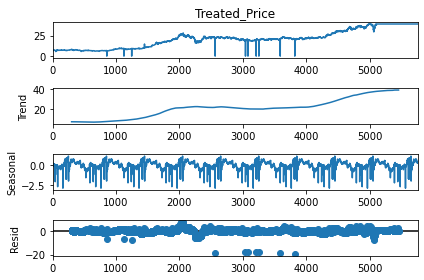

In [37]:
plt.figure(figsize=(30, 12))
decompose_ts_add = seasonal_decompose(data.Treated_Price,period=600)     
decompose_ts_add.plot()
plt.show()

It shows Trend is Exponatioal and Sesonality is Additive

In [38]:
data.set_index('Date')

,Close,Volume,Year,Treated_Price,Treated_Volume,Month
Date,,,,,,
2000-01-03,38.944569,28802010.00,2000,6.240558,5366.750413,Jan
2000-01-04,42.062302,41344215.75,2000,6.485546,6429.946792,Jan
2000-01-05,43.710136,41344215.75,2000,6.611364,6429.946792,Jan
2000-01-06,45.543640,41344215.75,2000,6.748603,6429.946792,Jan
2000-01-07,48.669109,41344215.75,2000,6.976325,6429.946792,Jan
...,...,...,...,...,...,...
2022-12-26,1536.181115,2764496.00,2022,39.194146,1662.677359,Dec
2022-12-27,1536.181115,2659749.00,2022,39.194146,1630.873692,Dec
2022-12-28,1536.181115,3442509.00,2022,39.194146,1855.399957,Dec


# Spliting Data

split date column

In [39]:
data['Day'] = pd.to_datetime(data['Date']).dt.strftime("%d")
data

,Date,Close,Volume,Year,Treated_Price,Treated_Volume,Month,Day
0,2000-01-03,38.944569,28802010.00,2000,6.240558,5366.750413,Jan,03
1,2000-01-04,42.062302,41344215.75,2000,6.485546,6429.946792,Jan,04
2,2000-01-05,43.710136,41344215.75,2000,6.611364,6429.946792,Jan,05
3,2000-01-06,45.543640,41344215.75,2000,6.748603,6429.946792,Jan,06
4,2000-01-07,48.669109,41344215.75,2000,6.976325,6429.946792,Jan,07
...,...,...,...,...,...,...,...,...
5750,2022-12-26,1536.181115,2764496.00,2022,39.194146,1662.677359,Dec,26
5751,2022-12-27,1536.181115,2659749.00,2022,39.194146,1630.873692,Dec,27
5752,2022-12-28,1536.181115,3442509.00,2022,39.194146,1855.399957,Dec,28
5753,2022-12-29,1536.181115,3198493.00,2022,39.194146,1788.433113,Dec,29


split monthwise 

In [40]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
month_dummies = pd.DataFrame(pd.get_dummies(data['Month']))
data = pd.concat([data,month_dummies],axis = 1)
data.head()
#import numpy as np
#p = data["Month"]

#data['months']= 0


,Date,Close,Volume,Year,Treated_Price,Treated_Volume,Month,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2000-01-03,38.944569,28802010.00,2000,6.240558,5366.750413,Jan,03,0,0,0,0,1,0,0,0,0,0,0,0
1,2000-01-04,42.062302,41344215.75,2000,6.485546,6429.946792,Jan,04,0,0,0,0,1,0,0,0,0,0,0,0
2,2000-01-05,43.710136,41344215.75,2000,6.611364,6429.946792,Jan,05,0,0,0,0,1,0,0,0,0,0,0,0
3,2000-01-06,45.543640,41344215.75,2000,6.748603,6429.946792,Jan,06,0,0,0,0,1,0,0,0,0,0,0,0
4,2000-01-07,48.669109,41344215.75,2000,6.976325,6429.946792,Jan,07,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
data.insert(20,'t',range(1,1+len(data)))
data.head()

,Date,Close,Volume,Year,Treated_Price,Treated_Volume,Month,Day,Apr,Aug,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,2000-01-03,38.944569,28802010.00,2000,6.240558,5366.750413,Jan,03,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2000-01-04,42.062302,41344215.75,2000,6.485546,6429.946792,Jan,04,0,0,...,0,1,0,0,0,0,0,0,0,2
2,2000-01-05,43.710136,41344215.75,2000,6.611364,6429.946792,Jan,05,0,0,...,0,1,0,0,0,0,0,0,0,3
3,2000-01-06,45.543640,41344215.75,2000,6.748603,6429.946792,Jan,06,0,0,...,0,1,0,0,0,0,0,0,0,4
4,2000-01-07,48.669109,41344215.75,2000,6.976325,6429.946792,Jan,07,0,0,...,0,1,0,0,0,0,0,0,0,5


In [42]:
data["t_squared"] = data["t"]*data["t"]
#Walmart1.columns
data["log_price"] = np.log(data["Treated_Price"])
#Walmart1.rename(columns={"Footfalls ": 'Footfalls'}, inplace=True)
#Walmart1.Footfalls.plot()
data.head()

,Date,Close,Volume,Year,Treated_Price,Treated_Volume,Month,Day,Apr,Aug,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_price
0,2000-01-03,38.944569,28802010.00,2000,6.240558,5366.750413,Jan,03,0,0,...,0,0,0,0,0,0,0,1,1,1.831070
1,2000-01-04,42.062302,41344215.75,2000,6.485546,6429.946792,Jan,04,0,0,...,0,0,0,0,0,0,0,2,4,1.869576
2,2000-01-05,43.710136,41344215.75,2000,6.611364,6429.946792,Jan,05,0,0,...,0,0,0,0,0,0,0,3,9,1.888790
3,2000-01-06,45.543640,41344215.75,2000,6.748603,6429.946792,Jan,06,0,0,...,0,0,0,0,0,0,0,4,16,1.909335
4,2000-01-07,48.669109,41344215.75,2000,6.976325,6429.946792,Jan,07,0,0,...,0,0,0,0,0,0,0,5,25,1.942522


#### Column Deleting

In [43]:
# Specify the columns to drop
columns_to_drop = ['Month','Close','Volume']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)


In [44]:
data.head()

,Date,Year,Treated_Price,Treated_Volume,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_price
0,2000-01-03,2000,6.240558,5366.750413,03,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1.831070
1,2000-01-04,2000,6.485546,6429.946792,04,0,0,0,0,1,0,0,0,0,0,0,0,2,4,1.869576
2,2000-01-05,2000,6.611364,6429.946792,05,0,0,0,0,1,0,0,0,0,0,0,0,3,9,1.888790
3,2000-01-06,2000,6.748603,6429.946792,06,0,0,0,0,1,0,0,0,0,0,0,0,4,16,1.909335
4,2000-01-07,2000,6.976325,6429.946792,07,0,0,0,0,1,0,0,0,0,0,0,0,5,25,1.942522


##### Spliting Data into train and test

In [45]:
#Split data into all years for train and last year data for test
train = data.head(5507)
test = data.tail(248)

In [46]:
train.shape

(5507, 20)

In [47]:
test.shape

(248, 20)

# Model Buliding

 ## Data Based Model
 1) Linear Model
 
 2) Quadratic 
 
 3) Additive seasonality
 
 4) Additive Seasonality Quadratic
 
## Data _Driven_Model
 
  1) Holt method 
  
  2) ARIMA model
  
  3) LSTM (Long Short-Term Memory)

### Data Based Model

In [48]:
#Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Treated_Price~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Treated_Price'])-np.array(pred_linear))**2))
print('The Linear model rmse is =',rmse_linear)

The Linear model rmse is = 2.375174668104013


In [49]:
#Quadratic model
# trend is non linear -expo or poly
#t t^2 target
Quad = smf.ols('Treated_Price~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Treated_Price'])-np.array(pred_Quad))**2))
rmse_Quad

0.6641707086439064

In [50]:
#Additive seasonality model

add_sea = smf.ols('Treated_Price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Treated_Price'])-np.array(pred_add_sea))**2))
rmse_add_sea

18.945469134648608

In [51]:
#Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Treated_Price~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Treated_Price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

0.7468428598583412

### Data _Driven_Model

Holt method 

In [83]:
# Holt method 
hw_model = Holt(train["Treated_Price"]).fit(smoothing_level=0.6, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
#print(MAPE(pred_hw,test.stationary_values))
rmse_holt = np.sqrt(np.mean((np.array(test['Treated_Price'])-np.array((pred_hw)))**2))
print('Root Mean Squared Error (RMSE):', rmse_holt)

Root Mean Squared Error (RMSE): 0.0


ARIMA model

 ACF & PACF plot
 
           ACF -Autocorrelation plot
           PACF-Partial auto-correlation function

<Figure size 1440x720 with 0 Axes>

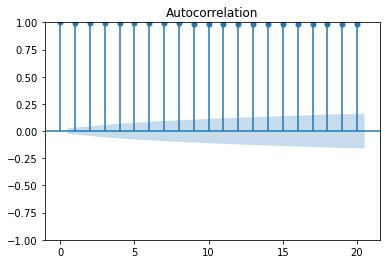

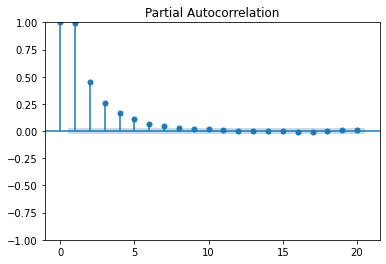

In [97]:
 #ACF plot & PACF plot
plt.figure(figsize=(20,10))
tsa_plots.plot_acf(data.Treated_Price,lags=20)
tsa_plots.plot_pacf(data.Treated_Price,lags=20)
plt.show()


In [61]:
# Find the best ARIMA model using AutoARIMA
model = auto_arima(train['Treated_Price'], seasonal=False, trace=True)

# Fit the model to the training data
model.fit(train['Treated_Price'])

# Forecast future stock prices
forecast = model.predict(n_periods=len(test['Treated_Price']))

# Calculate RMSE
mse_arima = mean_squared_error(test['Treated_Price'], forecast)
rmse_arima = math.sqrt(mse_arima)

# Print the forecasted stock prices and RMSE
print("Forecasted stock prices:")
print(forecast)
print("Root Mean Squared Error (RMSE):", rmse_arima)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14087.432, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16536.330, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15097.871, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14081.447, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16534.497, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14083.433, Time=1.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14083.433, Time=1.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14085.444, Time=1.67 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14083.558, Time=0.32 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 8.890 seconds
Forecasted stock prices:
5507    39.217941
5508    39.223861
5509    39.229781
5510    39.235701
5511    39.241621
          ...    
5750    40.656534
5751    40.662454
5752    40.668374
5753    40.674294
5754    40.680214
Length: 248, dtype: float64
Root Mean Squared Error (R

 Nerual Node -LSTM

In [62]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Treated_Price'].values.reshape(-1, 1))

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.80)  # 80% for training, 20% for testing
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the function to create input and output sequences for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Set the sequence length and create sequences for training
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)

# Create the LSTM model
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model1.add(LSTM(units=50, return_sequences=False))
model1.add(Dense(units=1))
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=30, batch_size=25)

# Make predictions on the test set
X_test, y_test = create_sequences(test_data, sequence_length)
y_pred = model1.predict(X_test)

# Inverse scale the predictions and the actual values
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
print(y_pred_inv)
print(y_test_inv)


Epoch 1/30
184/184 [==============================] - 7s 10ms/step - loss: 0.0072 - accuracy: 0.0011
Epoch 2/30
184/184 [==============================] - 2s 10ms/step - loss: 6.2736e-04 - accuracy: 8.7070e-04
Epoch 3/30
184/184 [==============================] - 2s 10ms/step - loss: 6.3335e-04 - accuracy: 8.7070e-04
Epoch 4/30
184/184 [==============================] - 2s 10ms/step - loss: 6.2157e-04 - accuracy: 8.7070e-04
Epoch 5/30
184/184 [==============================] - 2s 10ms/step - loss: 6.2803e-04 - accuracy: 0.0013
Epoch 6/30
184/184 [==============================] - 2s 11ms/step - loss: 6.4599e-04 - accuracy: 8.7070e-04
Epoch 7/30
184/184 [==============================] - 2s 11ms/step - loss: 6.5202e-04 - accuracy: 8.7070e-04
Epoch 8/30
184/184 [==============================] - 2s 10ms/step - loss: 6.4019e-04 - accuracy: 6.5303e-04
Epoch 9/30
184/184 [==============================] - 2s 10ms/step - loss: 6.5953e-04 - accuracy: 0.0011
Epoch 10/30
184/184 [==============

In [63]:
# Reverse the differencing process
lstm_original = train['Treated_Price'].iloc[-1] + y_pred_inv.cumsum()

# Display the shape of the resulting series
print(lstm_original.shape)


(1141,)


In [64]:
mse_lstm = mean_squared_error(y_test_inv, y_pred_inv)
rmse_lstm = math.sqrt(mse_lstm)
print("RMSE:", rmse_lstm)

RMSE: 0.5679330009122072


## Model Evaluation

In [65]:
#Compare the results 

data_model_1 = {"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_add_sea","rmse_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Quad,rmse_add_sea,rmse_add_sea_quad])}
table_rmse=pd.DataFrame(data_model_1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Quad,0.664171
3,rmse_add_sea_quad,0.746843
0,rmse_linear,2.375175
2,rmse_add_sea,18.945469


In [77]:

data_model_2= {"DATA_DRIVEN_MODEL":pd.Series(['Holt','ARIMA','LSTM']),"RMSE_Values":pd.Series([rmse_holt,rmse_arima,rmse_lstm])}
table_rmse=pd.DataFrame(data_model_2)
table_rmse.sort_values(['RMSE_Values'])

,DATA_DRIVEN_MODEL,RMSE_Values
0,Holt,0.000000
2,LSTM,0.567933
1,ARIMA,0.865766


###### LSTM is give the lowest RMSE values than other models so let's deploy project with using LSTM model

## Saving Model

In [100]:
import pickle
filename = 'Forcasting_lstm.pkl'
pickle.dump(model1, open(filename,'wb'))
model=pickle.load(open('Forcasting_lstm.pkl','rb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-07-01 14:29:29         2649
metadata.json                                  2023-07-01 14:29:29           64
variables.h5                                   2023-07-01 14:29:29       396208
Keras model ar